Introduction:
This project aims to develop a machine learning model to predict whether an individual's income exceeds $50K per year based on demographic and employment information from census data. Using a well-known dataset, the Adult Census Income dataset from the UCI Machine Learning Repository, the project explores the factors that influence income levels and builds a predictive model to classify individuals into two income groups: those earning above $50K and those earning below.

The dataset includes information such as age, education, occupation, work hours, and marital status, all of which are analyzed to identify patterns related to income. The final goal is to use this information to train a machine learning model that can accurately predict income categories.

Key steps in the project include:

Exploring the data to understand its structure and key trends.
Preprocessing the data by handling missing values, encoding categorical variables, and scaling numerical features.
Building the model, experimenting with different algorithms, and fine-tuning to improve accuracy.
Evaluating the model's performance using metrics like accuracy, precision, and recall.
Drawing insights from the model to understand which features have the greatest impact on income levels.
By the end of the project, the goal is to not only build a model that performs well but also to gain valuable insights into the factors that contribute to higher income levels, offering a deeper understanding of socio-economic dynamics in the dataset.



In [1]:
import pandas as pd
# Load the dataset
data = pd.read_csv('C:/Users/USER/Downloads/.ipynb_checkpoints/income_data.csv')

# Display the first few rows of the dataset
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [2]:
# Review data types
print("Data Types:\n", data.dtypes)

# Convert any column to the appropriate data type if necessary
# Example: Convert 'income' column to a categorical variable
data['income'] = data['income'].astype('category')

# Re-check data types after conversion
print("\nData Types after conversion:\n", data.dtypes)

# Generate summary statistics for numeric variables
print("\nSummary Statistics for Numeric Variables:\n", data.describe())

# Identify categorical and numerical variables
categorical_vars = data.select_dtypes(include=['object', 'category']).columns
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Variables:", list(categorical_vars))
print("Numerical Variables:", list(numerical_vars))

# Generate summary statistics for categorical variables
print("\nSummary Statistics for Categorical Variables:\n", data[categorical_vars].describe())

Data Types:
 age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Data Types after conversion:
 age                  int64
workclass           object
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country      object
income            category
dtype: object

Summary Statistics for Numeric Variables:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.8

In [3]:
# List of irrelevant features to drop
irrelevant_features = ['fnlwgt']  

# Drop the irrelevant columns from the DataFrame
data = data.drop(columns=irrelevant_features)

# Verify the features have been dropped
print(data.head())

   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country income  
0             0              40  United-States  <=50K  
1             0              13  U

In [4]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())
# Drop rows with any missing values
data_cleaned = data.dropna()

# Check if missing values are removed
print("Missing values after dropping rows:\n", data_cleaned.isnull().sum())

Missing values per column:
 age                 0
workclass         963
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64
Missing values after dropping rows:
 age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [5]:
# Identify numerical and categorical columns
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = data.select_dtypes(include=['object', 'category']).columns

print("Numerical Variables:", list(numerical_vars))
print("Categorical Variables:", list(categorical_vars))

Numerical Variables: ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Variables: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


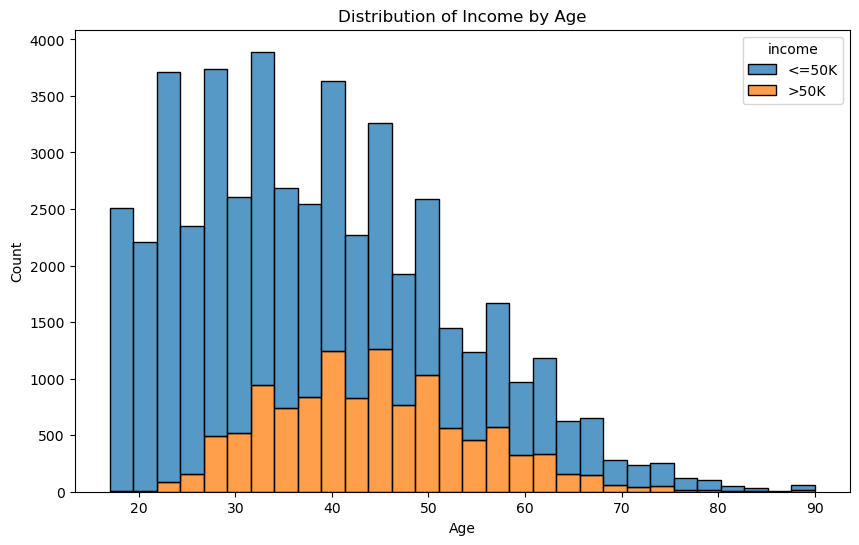

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of income by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', multiple='stack', bins=30)
plt.title('Distribution of Income by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

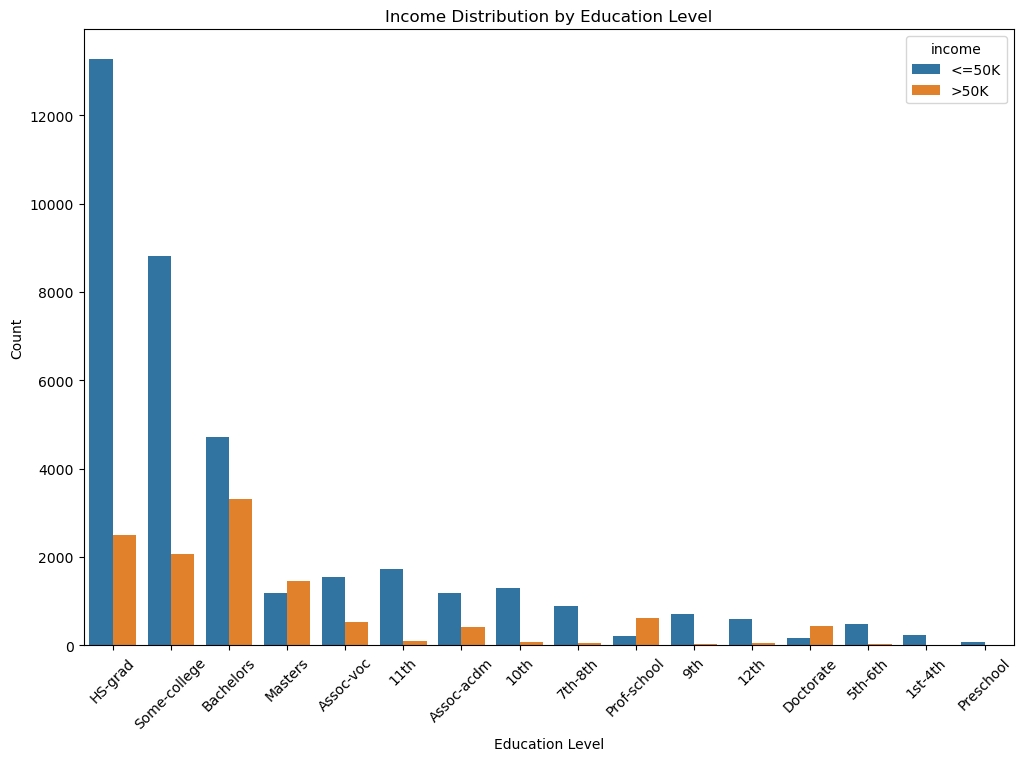

In [7]:
#Determine how different education levels affect income distribution.
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='education', hue='income', order=data['education'].value_counts().index)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Original column names:
 Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')
Cleaned column names:
 Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')


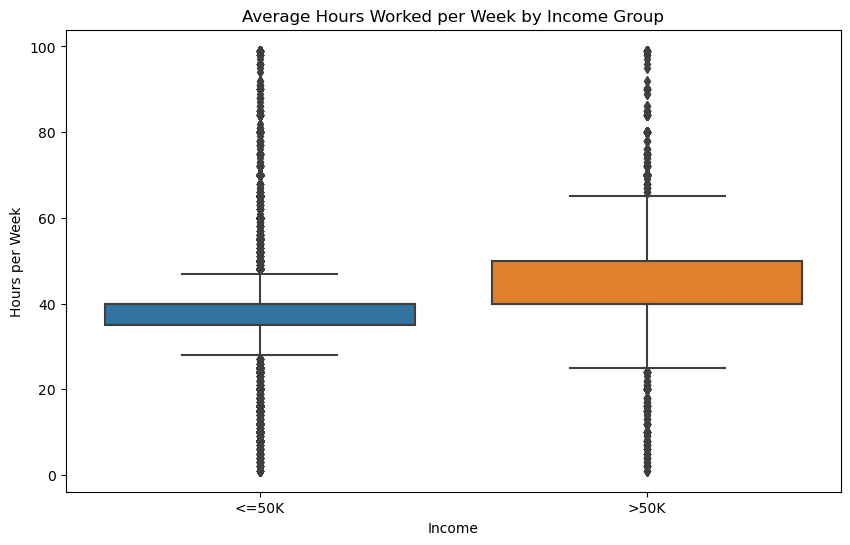

In [8]:
#Average Hours Worked per Week by Income Group
# Print column names to verify
print("Original column names:\n", data.columns)

# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()
print("Cleaned column names:\n", data.columns)

# Convert 'hours-per-week' to numeric
data['hours-per-week'] = pd.to_numeric(data['hours-per-week'], errors='coerce')

# Handle any potential NaN values resulting from the conversion
data['hours-per-week'].fillna(data['hours-per-week'].median(), inplace=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='income', y='hours-per-week')
plt.title('Average Hours Worked per Week by Income Group')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

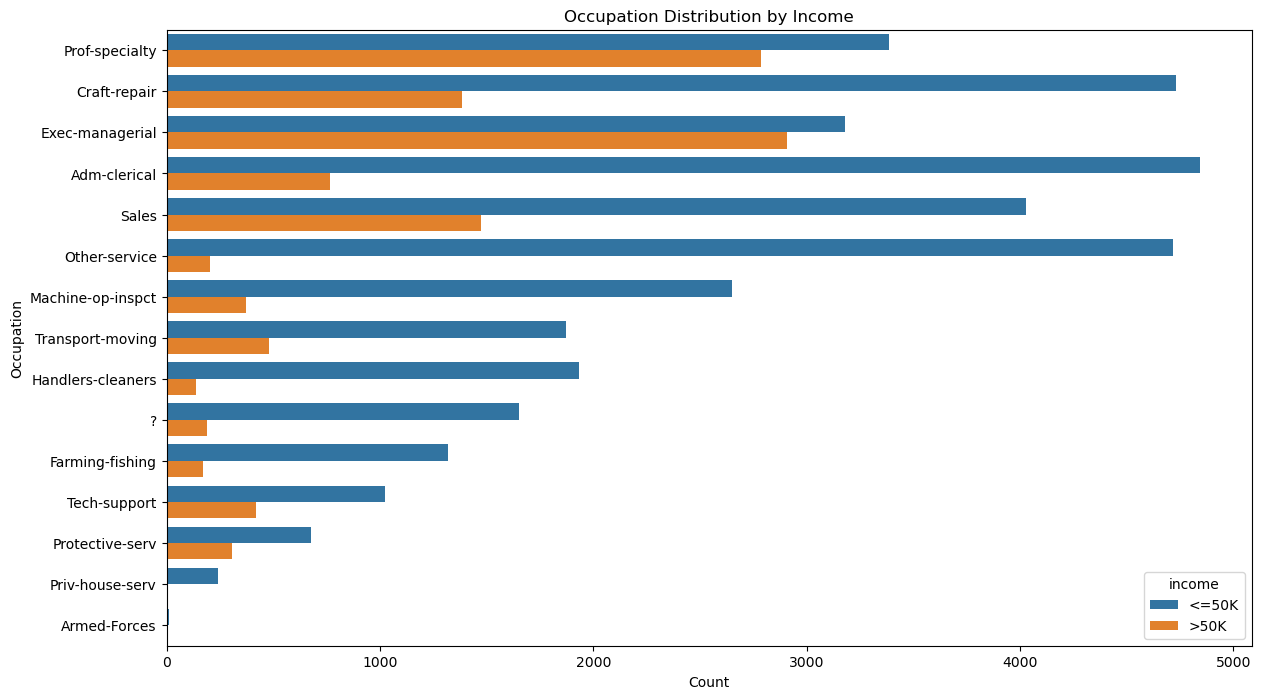

In [9]:
#Occupation Distribution by Income
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='occupation', hue='income', order=data['occupation'].value_counts().index)
plt.title('Occupation Distribution by Income')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

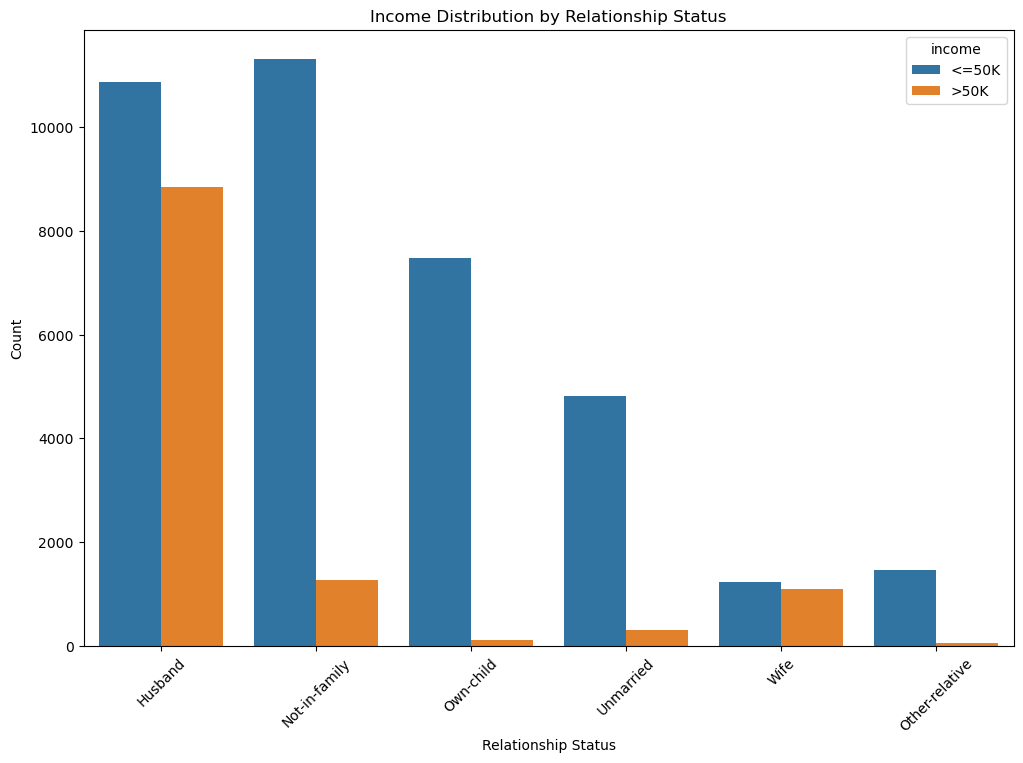

In [10]:
#Income by Relationship Status
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='relationship', hue='income', order=data['relationship'].value_counts().index)
plt.title('Income Distribution by Relationship Status')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

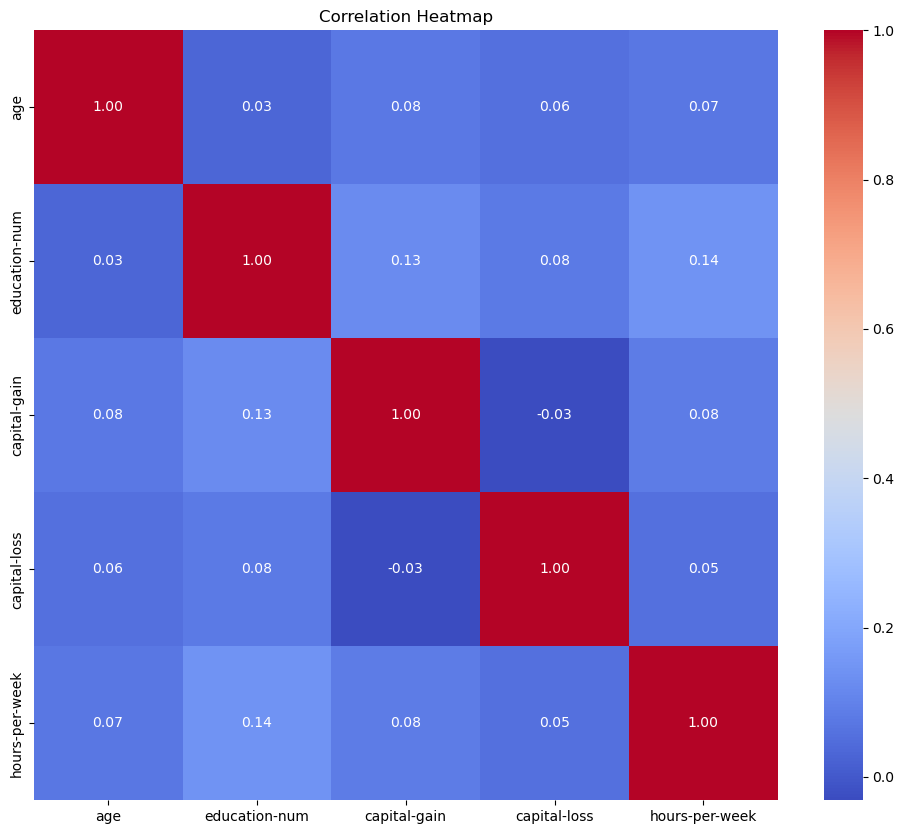

In [11]:
#Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = data[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

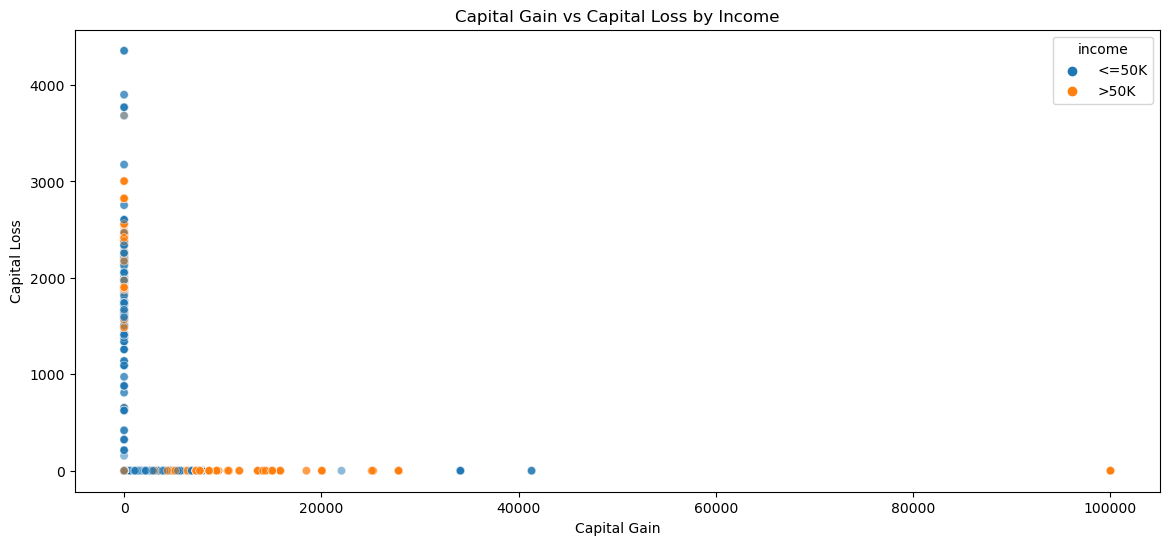

In [12]:
#the effect of capital gain and loss on income levels.
plt.figure(figsize=(14, 6))
sns.scatterplot(data=data, x='capital-gain', y='capital-loss', hue='income', alpha=0.5)
plt.title('Capital Gain vs Capital Loss by Income')
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

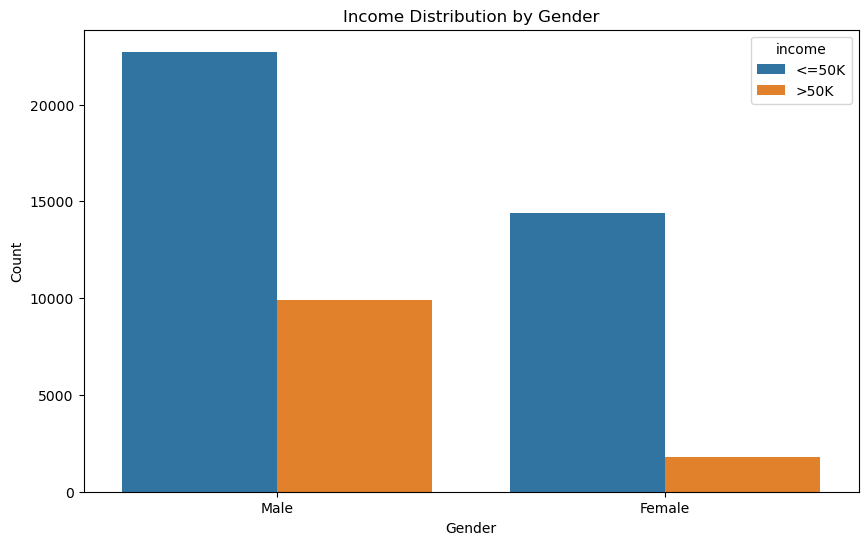

In [13]:
#income distribution by gender.
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='income')
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

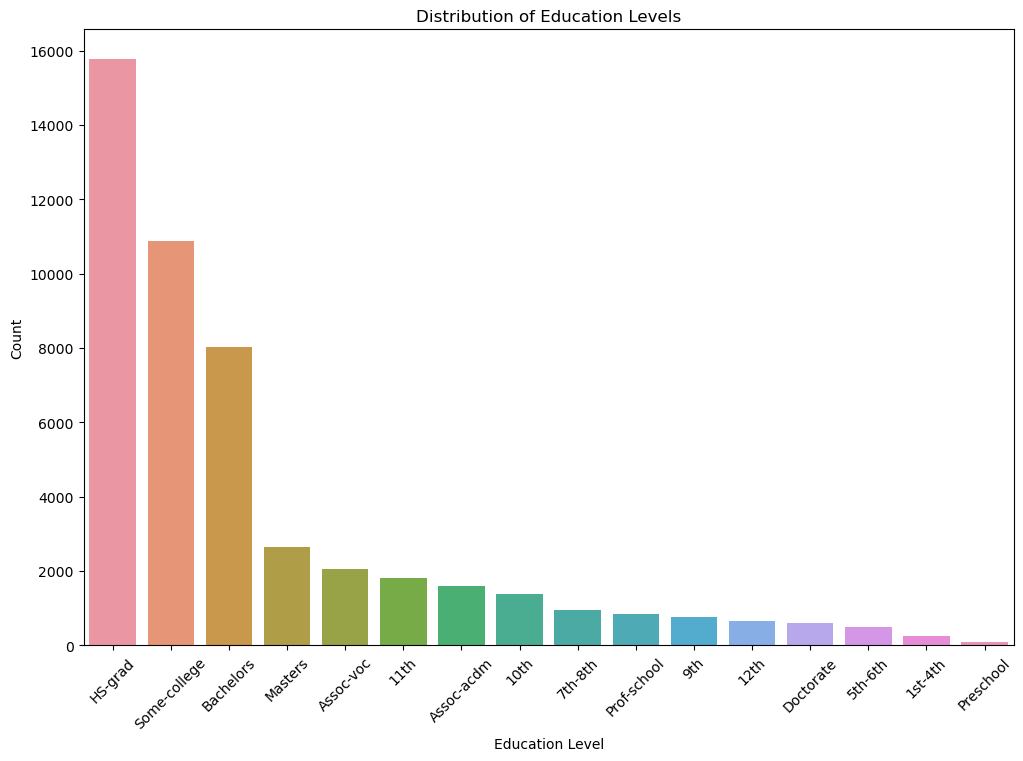

In [14]:
#Histogram of Education Level
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='education', order=data['education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
#Fill missing values in numerical columns with the mean
for column in numerical_vars:
    data[column].fillna(data[column].mean(), inplace=True)
# Fill missing values in categorical columns with the mode (most frequent value)
for column in categorical_vars:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)
# Verify that missing values are handled
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country']

# Apply label encoding to categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows to verify
print(data.head())

   age  workclass  education  education-num  marital-status  occupation  \
0   39          7          9             13               4           1   
1   50          6          9             13               2           4   
2   38          4         11              9               0           6   
3   53          4          1              7               2           6   
4   28          4          9             13               2          10   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   native-country income  
0              39  <=50K  
1              39  <=50K  
2              39  <=50

In [17]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows to verify
print(data_encoded.head())

   age  education-num  capital-gain  capital-loss  hours-per-week income  \
0   39             13          2174             0              40  <=50K   
1   50             13             0             0              13  <=50K   
2   38              9             0             0              40  <=50K   
3   53              7             0             0              40  <=50K   
4   28             13             0             0              40  <=50K   

   workclass_0  workclass_1  workclass_2  workclass_3  ...  native-country_32  \
0        False        False        False        False  ...              False   
1        False        False        False        False  ...              False   
2        False        False        False        False  ...              False   
3        False        False        False        False  ...              False   
4        False        False        False        False  ...              False   

   native-country_33  native-country_34  native-country_

In [18]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to standardize
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the standardized numerical features
print(data[numerical_columns].head())

        age  education-num  capital-gain  capital-loss  hours-per-week
0  0.025996       1.136512      0.146932     -0.217127       -0.034087
1  0.828308       1.136512     -0.144804     -0.217127       -2.213032
2 -0.046942      -0.419335     -0.144804     -0.217127       -0.034087
3  1.047121      -1.197259     -0.144804     -0.217127       -0.034087
4 -0.776316       1.136512     -0.144804     -0.217127       -0.034087


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the numerical columns
data[numerical_columns] = min_max_scaler.fit_transform(data[numerical_columns])

# Display the normalized numerical features
print(data[numerical_columns].head())

        age  education-num  capital-gain  capital-loss  hours-per-week
0  0.301370       0.800000       0.02174           0.0        0.397959
1  0.452055       0.800000       0.00000           0.0        0.122449
2  0.287671       0.533333       0.00000           0.0        0.397959
3  0.493151       0.400000       0.00000           0.0        0.397959
4  0.150685       0.800000       0.00000           0.0        0.397959


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
#load dataset
data = pd.read_csv('C:/Users/USER/Downloads/.ipynb_checkpoints/income_data.csv')
# Strip column names
data.columns = data.columns.str.strip()

# Handle missing values (example)
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)

# Convert categorical income column to binary
data['income'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Split features and target variable
X = data.drop('income', axis=1)
y = data['income']

# Preprocessing: One-hot encoding for categorical variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns), # Standardize numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns) # One-hot encode categorical columns
])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Principal Component Analysis (PCA)
pca = PCA(n_components=5)

#Variance Threshold for feature selection
variance_threshold = VarianceThreshold(threshold=0.01)  # Remove features with low variance

#SelectKBest for selecting best features based on ANOVA F-test
select_k_best = SelectKBest(score_func=f_classif, k=10)

#Capture interaction between features 
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Define a full pipeline including preprocessing, feature selection, and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', variance_threshold),  # Try different techniques here, e.g., select_k_best, pca
    ('model', RandomForestClassifier())])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.45%


In [21]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your preprocessed dataframe and 'target_column' is the target variable name
X = data.drop(columns=['income'])  # Features (all columns except the target)
y = data['income']  # Target (income column)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure the split
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (39073, 14), (39073,)
Testing set shape: (9769, 14), (9769,)


In [22]:
# Import necessary libraries from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical variables to numerical format using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Split the encoded dataset into features and labels again
X = data_encoded.drop('income', axis=1)  # Features
y = data_encoded['income']         

# Standardize/normalize the numerical features to ensure they are on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize different algorithms
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iterate over the models, train and evaluate each
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Accuracy of Logistic Regression: 0.85
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11109
           1       0.74      0.58      0.65      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653


Training Decision Tree...
Accuracy of Decision Tree: 0.82
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     11109
           1       0.62      0.63      0.62      3544

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653


Training Random Forest...
Accuracy of Random Forest: 0.86
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11109
           1       0.74      0.62      0.68     

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define parameter grids for each model
param_grid_logistic = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],  # Use 'liblinear' to support 'l1' penalty
    'penalty': ['l1', 'l2']
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize models
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_logistic),
    'Random Forest': (RandomForestClassifier(), param_grid_random_forest)}
    

# Iterate over the models, perform grid search, and print the results
for model_name, (model, param_grid) in models.items():
    print(f"\nOptimizing {model_name}...")
    
    # Initialize GridSearchCV with error_score='raise'
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1, error_score='raise')
    
    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Best parameters and best score
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model on the testing set
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name} on the test set: {accuracy:.4f}")

    #save the best model
    import joblib
    joblib.dump(best_model, f'{model_name.replace(" ", "_")}_best_model.pkl')

print("\nHyperparameter tuning and model evaluation completed.")


Optimizing Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.8534

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     11109
           1       0.74      0.58      0.65      3544

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.84     14653

Accuracy of Logistic Regression on the test set: 0.8495

Optimizing Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Score for Random Forest: 0.8647

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0     

Accuracy: 0.8536
Precision: 0.7367
Recall: 0.6143
F1 Score: 0.6699
ROC-AUC: 0.9008


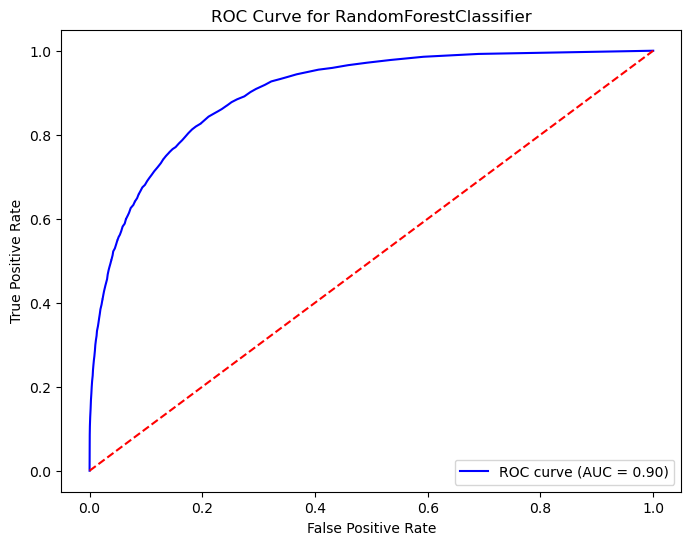

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # For ROC-AUC, some models like SVM may require probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    else:
        y_pred_prob = model.decision_function(X_test)
    
    # Calculate different evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

#Evaluating a specific model
best_model = RandomForestClassifier()  
best_model.fit(X_train, y_train)       
evaluate_model(best_model, X_test, y_test)

In [27]:
!pip install joblib
import joblib

# Save the trained model to a file
joblib.dump(best_model, 'trained_model.joblib')
print("Model saved as 'trained_model.joblib'")
# Load the model from the file
loaded_model = joblib.load('trained_model.joblib')
print("Model loaded from 'trained_model.joblib'")


Model saved as 'trained_model.joblib'
Model loaded from 'trained_model.joblib'


Key Insights from Exploratory Data Analysis (EDA):
Demographic Influence on Income:
Age: Older individuals tend to have a higher likelihood of earning more than $50K annually. The younger population is predominantly in the below $50K category.

Education: Higher educational attainment (such as a Bachelor's degree or above) is strongly associated with earning more than $50K, whereas lower education levels correspond to lower income.

Workclass: While the majority of individuals work in the private sector, those employed by the government are more likely to earn over $50K.

Marital Status: Married individuals, especially those in "Married-civ-spouse" relationships, have a significantly higher chance of earning above $50K.

Work-Related Factors:
Hours Worked per Week: Those working 40 or more hours per week are more likely to have higher incomes.

Occupation: Roles such as Executive/Managerial and Professional-Specialty show a higher proportion of individuals earning over $50K, in contrast to blue-collar roles like machine operators or service jobs.

Capital Gains: There is a strong correlation between higher capital gains and income exceeding $50K.

Gender and Race:
Gender: Men are overrepresented in the higher income group, while women are more common in the lower income bracket.

Race: Whites are more likely to earn above $50K compared to other racial groups, although the analysis doesn't delve into underlying socioeconomic factors.

Machine Learning Model Performance:
Logistic Regression:
Accuracy: 85%
Strengths: Good for binary classification, providing a solid balance between precision and recall when predicting income levels.
Weaknesses: It struggles with the imbalanced dataset, particularly in predicting the higher income group, with lower precision (0.74) and recall (0.58) for the >$50K class.

Decision Tree:
Accuracy: 82%
Strengths: Captures non-linear relationships and is easy to interpret.
Weaknesses: Prone to overfitting, leading to lower recall (0.63) for the >$50K group.

Random Forest:
Accuracy: 85%
Strengths: Reduces overfitting by using multiple decision trees and provides solid overall performance.
Weaknesses: Despite better performance than a single decision tree, recall for the >$50K group remains low (0.62).

Support Vector Machine (SVM):
Accuracy: 85%
Strengths: Well-suited for handling high-dimensional data and performs well when a clear margin exists between classes.
Weaknesses: Computationally expensive and struggles with imbalanced data, with a recall of only 0.54 for the higher-income group.

K-Nearest Neighbors (KNN):
Accuracy: 82%
Strengths: Easy to understand and implement.
Weaknesses: It performs poorly with imbalanced data, resulting in low precision (0.65) and recall (0.56) for predicting higher incomes.

Naive Bayes:
Accuracy: 60%
Strengths: Works well for simple, linear relationships.
Weaknesses: Assumes feature independence, leading to poor performance, especially for predicting the higher-income class.

Discussion and Potential Improvements:
Addressing Class Imbalance: Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights can help improve performance for the underrepresented higher-income group.

Feature Engineering: Creating more meaningful features, like interaction terms between variables or transforming continuous features into bins (e.g., age or hours worked), could improve model performance.

Hyperparameter Tuning: Using methods like GridSearchCV or RandomizedSearchCV can optimize model parameters, leading to improved results.

Advanced Modeling Techniques: Trying boosting algorithms like XGBoost or LightGBM, which perform well on imbalanced datasets, could yield better accuracy, precision, and recall.

Performance Metrics: Focusing on F1 score and ROC-AUC rather than just accuracy can give a clearer picture of the model’s handling of imbalanced data.

Ensemble Methods: Combining models using stacking or voting classifiers can leverage the strengths of multiple algorithms, potentially improving predictions for the higher-income group.